In [ ]:
# Author María Martínez
# Creation Date 051023 

import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Read the dataset
df=pd.read_csv('Dataset/AccidentesAereos_ETL.csv',index_col=0)
df.info()

In [ ]:
# Convert the column'fecha' to date type
df['fecha'] = pd.to_datetime(df['fecha'])

# For analysis purposes I am going to add an auxiliary column with the year of the accident
df['anio']=df['fecha'].dt.year

In [ ]:
ProfileReport(df)

In [ ]:
# ANÁLISIS DEL REPORTE
# columna: fecha
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='fecha', bins=20, color='xkcd:azure',kde=True)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de número de accidentes por fecha')
plt.show()

In [ ]:
# According to the report and this graph, we see that after 1940 and before 2000, 
# we have the highest concentration of air accidents. 
# According to the report, in this dataset, the top 10 years with the most fatal accidents
# were all before 1995, with the maximum peak in 1946. In theory, this makes sense if we take into account
# that commercial aviation began to take place. around 1914[1] and grew noticeably in popularity from
# the 1950s[2]. This means that around the dates where we have our peaks, there were more aircraft flying 
# with passengers on board than in previous years. 
# Adding to this, it is known that the first generation of jets (1952 to 1964) had a high accident rate,
# largely because maintenance practices for the aircraft were inadequate. 
# Hence, since 1960, exhaustive research was carried out to improve this situation, led by United Airlines
# and supported by the United States Department of Defense, which in 1978 bore fruit by generating 
# new maintenance standards that had to be followed in aviation to guarantee the reliability of the machines
# (to this day this standard is maintained and has become the maintenance standard for many other sectors
# more internationally). The application of this new methodology was successful in reducing accident 
# levels in the following years, when it finally became an international standard and began to be widely
# used [3][4].

# columns: route and operator

# For this column, according to the report, the largest number of accidents have occurred on the route 
# to Moscow, Russia. Going forward a little, this makes sense with the operator column, since the largest
# number of air accidents in this dataset correspond to Aeroflot, a Russian airline that was founded in 1923
# [5]. According to statistics, Aeroflot has had five times more accidents than any other airline, especially 
# during the time of the Soviet Union. In this dataset, there are more accidents recorded for Aeroflot
# than for the air forces of any country included.

# Now, I am interested in reviewing the number of accidents on civil vs. military flights.
df_tflight=df[df.operador.notna()]
df_tflight=df_tflight.reset_index(drop=True)

df_military=df_tflight[df_tflight['operador'].str.contains('Military', regex=False)]
df_military.shape[0]

df_civil=df_tflight[~df_tflight['operador'].str.contains('Military', regex=False)]
df_civil.shape[0]

cuentac=df_civil['anio'].value_counts().reset_index()
cuentac=cuentac.sort_values('count')

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=cuentac, x='count', y='anio', color='xkcd:darkgreen',label='Militar')
sns.lineplot(data=cuentac, x='count', y='anio',color='xkcd:azure',label='Civil')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por año')
plt.legend()
plt.show()

As we can see in the previous graph, during the times of the First and Second World Wars, military air accidents increased and exceeded civil accidents, which makes total sense, taking into account that the air forces played a very important role. in both conflicts. Just after the peak of the World War II years, we see a significant increase in civilian accidents, which is consistent with the time when commercial airlines began to become more popular and tickets cheaper.

column: tipo_aeronave

The Douglas DC-3 model seems to be the one that has had the most accidents historically, this model had a high impact on the airline industry during the 1930s, 1940s and the Second World War. These aircraft were adopted by both the civil and military aviation industries and various versions were adapted depending on use. This agrees with the graphs analyzed previously, where a high incidence of accidents was evident after 1940. It should be noted that this type of aircraft is no longer so common, it is no longer produced and the few that remain are usually used as airliners. burden. This is also the case for the airplanes that are in the top 10 accidents of this dataset, the majority are old, small models and manufactured by the Douglas Aircraft Company, which had their greatest impact during times of war and main development of the commercial aviation. So much so that this company currently does not exist, since it merged in 1967 with McDonnell Aircraft and then, in 1997 with Boeing, which is why the Boeing logo that we know today is the same one that Douglas used to have[7].

column: total_abordo

Taking into account the report, the information is conclusive with what we observed in the previous column, the majority of accidents in this dataset correspond to old models that were significantly small compared to the commercial airplanes we know today, therefore, We have that the largest number of accidents had few people on board.

column: pasajeros_abordo

According to the report, the most common value of passengers on board is 0, this can be explained because not all accidents recorded here involve commercial aircraft. Following 0, we can see that the other most common records in the top 10 do not exceed 10 passengers. This is consistent with the information previously recorded.

column: tripulacion_abordo

The most common numbers of people belonging to the crew are between 3 and 5, which I would say is usual for various sectors of the airline industry.

In [ ]:
df['tripulacion_abordo']=df['tripulacion_abordo'].astype('float')

In [ ]:
# I want to review the outliers in this category, which I will take as those above 25, 
# which according to the report are the largest values.
df[df['tripulacion_abordo']>25]

In [77]:
# As can be seen, these values correspond mostly to military Zeppelins in which everyone on board 
# is considered crew and those that are civilians are commercial flights in which there was a mid-air collision 
# between two planes, so the values of both

# Columns: total_fatalidades and tierra_fatalidades

df['total_fatalidades']=df['total_fatalidades'].astype('int')
df['tierra_fatalidades']=df['tierra_fatalidades'].astype('float')

In [78]:
fat_abordo_anio=df.groupby('anio')['total_fatalidades'].sum().reset_index()


In [79]:
fat_tierra_anio=df.groupby('anio')['tierra_fatalidades'].sum().reset_index()


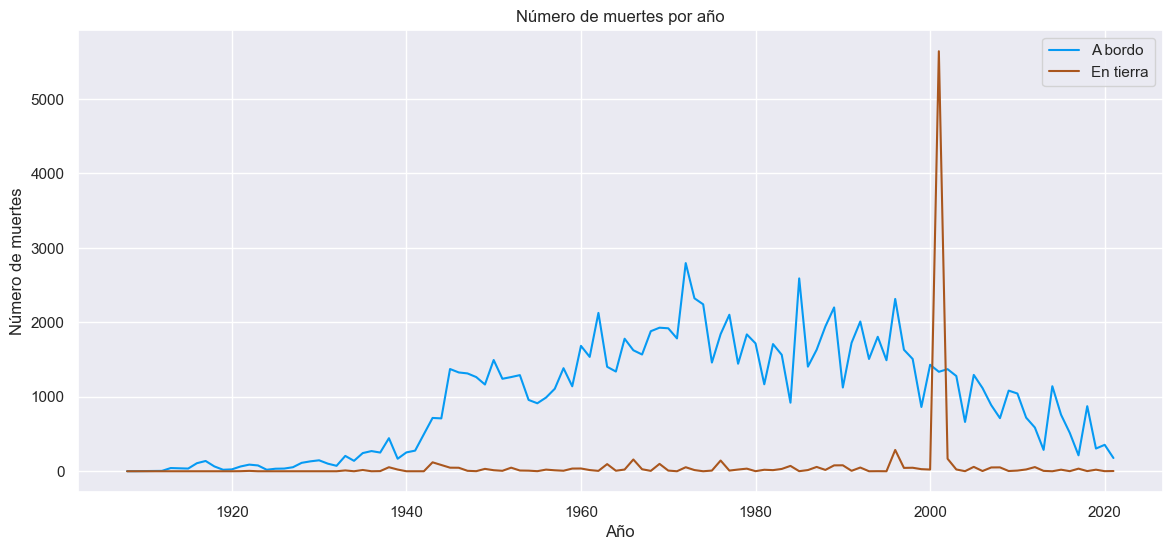

In [80]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=fat_abordo_anio, x='anio', y='total_fatalidades', color='xkcd:azure',label='A bordo')
sns.lineplot(data=fat_tierra_anio, x='anio', y='tierra_fatalidades',color='xkcd:sienna',label='En tierra')
plt.xlabel('Año')
plt.ylabel('Número de muertes')
plt.title('Número de muertes por año')
plt.legend()
plt.show()

As we see in this graph, it is really rare that there are many deaths on the ground when a plane crashes, however, we can see that there is a peak of fatalities on the ground in 2001, this corresponds to the terrorist attack on the World Trade Center (9 /11), in which two planes crashed into its two towers, which were full of people in New York City. Below is the detail of these outlier values.

In [81]:
df[df['tierra_fatalidades']>2000]

,fecha,hora_declarada,ruta,operador,tipo_aeronave,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fatalidades,pasajeros_fatalidades,tripulacion_fatalidades,tierra_fatalidades,anio
4327,2001-09-11,847.0,"New York City, New York",American Airlines,Boeing 767-223ER,92,81.0,11.0,92,81.0,11.0,2750.0,2001
4328,2001-09-11,903.0,"New York City, New York",United Air Lines,Boeing B-767-222,65,56.0,9.0,65,56.0,9.0,2750.0,2001


In [ ]:
# According to the report, for this dataset, the most common value of fatalities is 1 and in the top 10
# it is followed by values in the range of 2 to 13. This is consistent with the conclusions that 
# were previously drawn from the other columns

In [82]:
fat_abordo_anio[fat_abordo_anio['total_fatalidades']>2600]


,anio,total_fatalidades
61,1972,2796


KPI solicitado

In [83]:
df['total_abordo']=df['total_abordo'].astype('int')

In [84]:
tot_abordo_anio=df.groupby('anio')['total_abordo'].sum().reset_index()


In [85]:
tasamortan=fat_abordo_anio.merge(tot_abordo_anio, on='anio', how='outer')


In [87]:
tasamortan['tasa_mortalidad_anual']=tasamortan['total_fatalidades'].divide(tasamortan['total_abordo'])
tasamortan

,anio,total_fatalidades,total_abordo,tasa_mortalidad_anual
0,1908,1,2,0.500000
1,1909,1,1,1.000000
2,1912,5,5,1.000000
3,1913,43,49,0.877551
4,1915,36,60,0.600000
...,...,...,...,...
106,2017,214,245,0.873469
107,2018,874,1239,0.705408
108,2019,305,432,0.706019
109,2020,355,703,0.504979


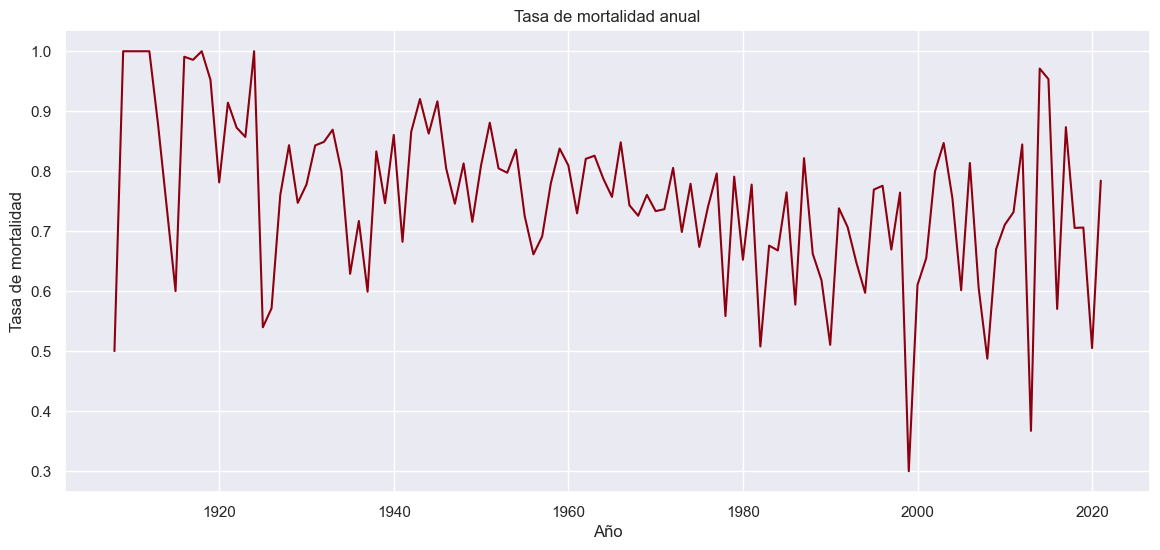

In [88]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=tasamortan, x='anio', y='tasa_mortalidad_anual', color='xkcd:crimson')
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Tasa de mortalidad anual')
plt.show()

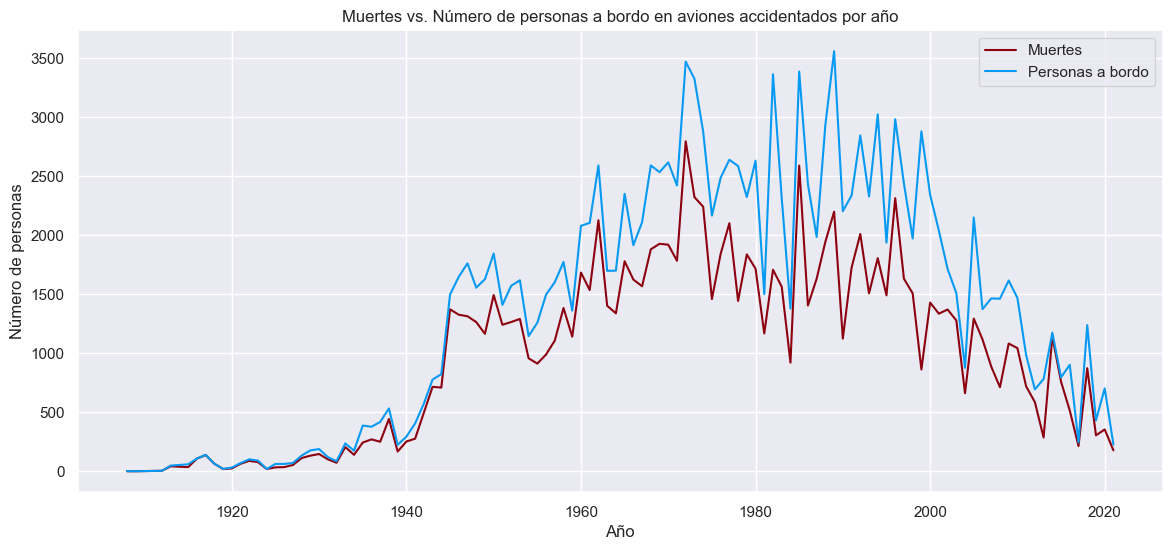

In [89]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=tasamortan, x='anio', y='total_fatalidades', color='xkcd:crimson',label='Muertes')
sns.lineplot(data=tasamortan, x='anio', y='total_abordo', color='xkcd:azure',label='Personas a bordo')
plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.title('Muertes vs. Número de personas a bordo en aviones accidentados por año')
plt.show()

KPIs propuestos
Tasa anual de fatalidades por accidentes

El objetivo es disminuir por lo menos en un 10% la tasa de fatalidades anualmente. Número de fallecidos en los accidentes aereos en relacion al número total de accidentes registrados.

In [90]:
accidents_by_year = df.groupby('anio')['fecha'].count().reset_index()


In [91]:
tasamortan=tasamortan.merge(accidents_by_year, on='anio',how='outer')


In [92]:
tasamortan.rename(columns={'fecha':'accidentes_anio'},inplace=True)


In [93]:
tasamortan['fatalidades_accidentes']=tasamortan['total_fatalidades'].divide(tasamortan['accidentes_anio'])


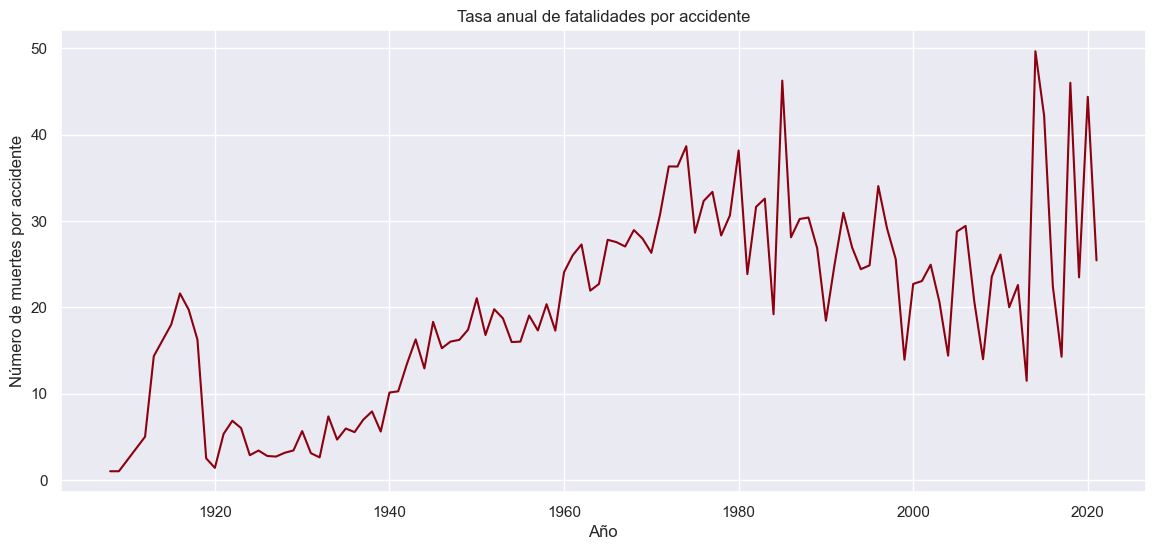

In [94]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=tasamortan, x='anio', y='fatalidades_accidentes', color='xkcd:crimson')
plt.xlabel('Año')
plt.ylabel('Número de muertes por accidente')
plt.title('Tasa anual de fatalidades por accidente')
plt.show()

Fatal accidents due to total accidents

Number of fatal accidents (where everyone on board died) in relation to the total number of accidents per year. The objective for each year is that the rate of fatal accidents per total accidents remains below 50%.

In [96]:
accnofatales=df[df['total_fatalidades']==0].groupby('anio')['total_fatalidades'].count().reset_index()
accfatales=df[df['total_fatalidades']==df['total_abordo']].groupby('anio')['total_fatalidades'].count().reset_index()
acctot=df.groupby('anio')['fecha'].count().reset_index()
acctot

,anio,fecha
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
106,2017,15
107,2018,19
108,2019,13
109,2020,8


In [97]:
acc=accfatales.merge(accnofatales,on='anio',how='outer')
acc=acc.merge(acctot,on='anio',how='outer')

In [98]:
acc.rename(columns={'total_fatalidades_x':'num_acc_fatales', 'total_fatalidades_y':'num_acc_nofatales', 'fecha':'total_acc'},inplace=True)
acc['num_acc_nofatales'].fillna(0,inplace=True)
acc['num_acc_fatales'].fillna(0,inplace=True)

In [99]:
acc['tasa_fatal']=acc['num_acc_fatales']/acc['total_acc']


In [100]:
acc=acc.sort_values(['anio'])
acc=acc.reset_index(drop=True)
acc

,anio,num_acc_fatales,num_acc_nofatales,total_acc,tasa_fatal
0,1908,0.0,0.0,1,0.000000
1,1909,1.0,0.0,1,1.000000
2,1912,1.0,0.0,1,1.000000
3,1913,2.0,0.0,3,0.666667
4,1915,1.0,0.0,2,0.500000
...,...,...,...,...,...
106,2017,12.0,0.0,15,0.800000
107,2018,11.0,0.0,19,0.578947
108,2019,9.0,0.0,13,0.692308
109,2020,3.0,0.0,8,0.375000


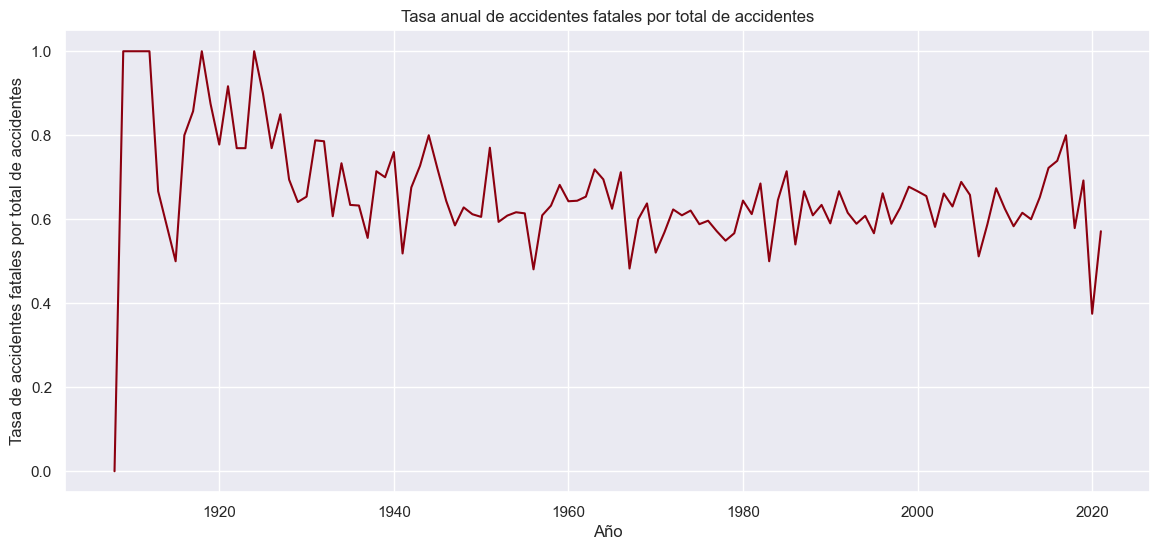

In [101]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=acc, x='anio', y='tasa_fatal', color='xkcd:crimson')
plt.xlabel('Año')
plt.ylabel('Tasa de accidentes fatales por total de accidentes')
plt.title('Tasa anual de accidentes fatales por total de accidentes')
plt.show()

Accident rate without fatalities

Rate of accidents in which no one died in relation to the total number of accidents. The goal is for this KPI to increase by at least 10% over a 3-year period.

In [102]:
acc['tasa_no_fatal']=acc['num_acc_nofatales']/acc['total_acc']


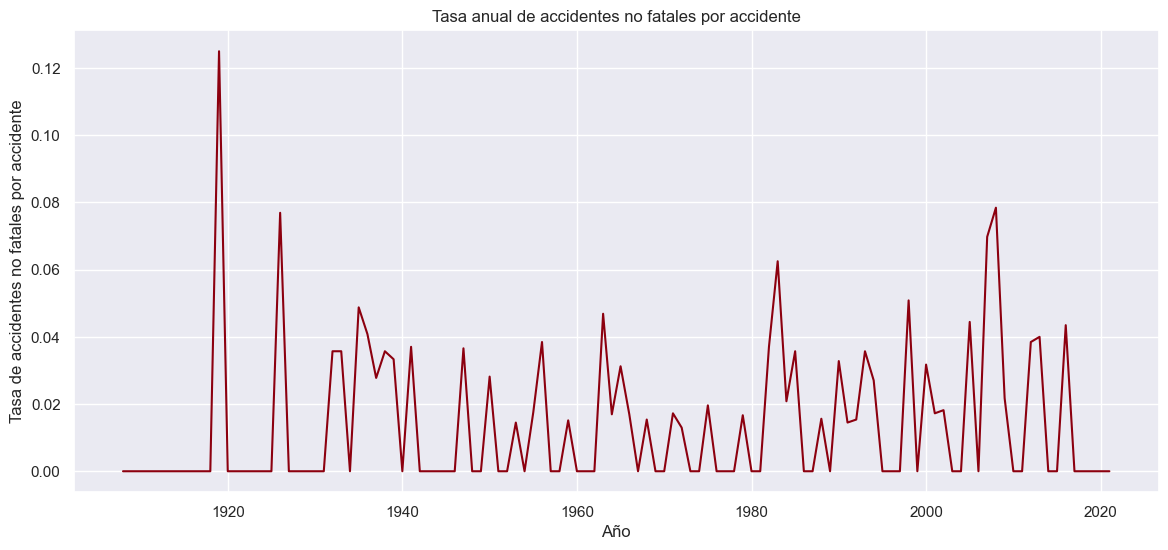

In [103]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=acc, x='anio', y='tasa_no_fatal', color='xkcd:crimson')
plt.xlabel('Año')
plt.ylabel('Tasa de accidentes no fatales por accidente')
plt.title('Tasa anual de accidentes no fatales por accidente')
plt.show()